In [8]:
%matplotlib inline
import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
import nimfa as nf
from helpers import *
from plots import *
from mf_sgd import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


number of items: 10000, number of users: 1000


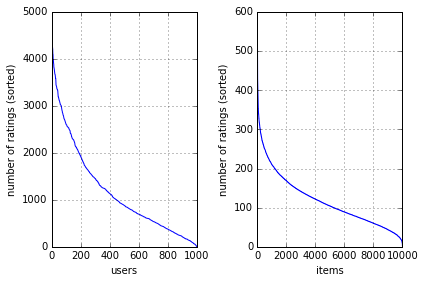

In [9]:
path_dataset = "../data/data_train.csv"
ratings = load_data(path_dataset)

num_items_per_user, num_users_per_item = plot_raw_data(ratings)

In [10]:
from helpers import *
valid_ratings, train, test = split_data(ratings, num_items_per_user, num_users_per_item, min_num_ratings=0, p_test=0.1)

#plot_train_test_data(train, test)

print(valid_ratings.shape)
print(train.shape)
print(test.shape)

Total number of nonzero elements in origial data:1176952
Total number of nonzero elements in train data:1059256
Total number of nonzero elements in test data:117696
(10000, 1000)
(10000, 1000)
(10000, 1000)


In [17]:
print(np.arange(20,51))

[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50]


In [99]:
import numpy as np

import nimfa

V = valid_ratings

num_features = 20

#init_W = np.random.rand(V.shape[0], num_features)
#init_H = np.random.rand(num_features, V.shape[1])

# MF on train set usi
nmf = nimfa.Nmf(V, seed="random")
nmf_fit = nmf()


W = nmf.basis()
Z = nmf.coef()

"""
rank_range = np.arange(20,51)
n_run = 10
summaries = nmf.estimate_rank(rank_range,n_run)
"""
"""print("Euclidean distance: %5.3f" % nmf_fit.distance(metric="euclidean"))
print('Initialization type: %s' % nmf_fit.seeding)
print('Iterations: %d' % nmf_fit.n_iter)

"""

'print("Euclidean distance: %5.3f" % nmf_fit.distance(metric="euclidean"))\nprint(\'Initialization type: %s\' % nmf_fit.seeding)\nprint(\'Iterations: %d\' % nmf_fit.n_iter)\n\n'

In [84]:
def compute_error(data, W, Z):
    mse = 0
    rows, cols = data.nonzero()
    omega = list(zip(rows, cols))
    WZ = np.dot(W, Z)
    for d, n in omega:
        mse += np.power(data[d,n] - WZ[d,n], 2)
    
    rmse = np.sqrt(mse/len(omega))
    return rmse

In [100]:
# Compute error on train set
rmse_train = compute_error(train, W, Z)

# Compute error on test set
rmse_test = compute_error(test, W, Z)


In [104]:
print(rmse_train)
print(rmse_test)

2.97784822711
2.97590203131


In [97]:
from collections import deque
import datetime
from helpers import *
now = datetime.datetime.now()
now_str = now.strftime("%d-%m-%Y_%Hh%M_%S")
output_path = '../data/predictions-%s-group-clm.csv' % now_str

indices = extract_indices('../data/sampleSubmission.csv')

WZ = np.dot(W, Z)
ratings_to_write = deque()
for row, col in indices:
    ratings_to_write.append((row, col, WZ[row,col]))
    
create_csv_submission(ratings_to_write, output_path)


999   0


In [73]:
sm = summaries

for iteration in sm.items():    
    summary = iteration[1]
    print(summary['rss'])
    print(summary['euclidean'])


13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
13058556.3516
